# DAV 6150 Module 4 Assignment - Feature Selection & Dimensionality Reduction
Alejandra Zapata, Brian Livian, Ke Chen

## 1. Introduction
The Automobile Data Set will be used for regression model creation. According to the data set profiling information, there are 26 attributes in the data set, with attribute "city_mpg" to be the response variable for predicting the automobile gas mileage, while other 25 attributes to be selected as explanatory variables or dropped. 

The planned steps will be addressed below:
- 1. Perform exploratory data analysis and general overview the data set.
- 2. Deal with the missing values and outliers, normalize the column if needed.
- 3. Based on the EDA results, select/combine the features to be the explanatory variables of regression model.
- 4. Applying the reduced dimension features to perform regression model, also the accuracy of the model will be evaluated.

First things first, the data set will be imported as pandas data frame and add the column names according to the data set information.

In [1]:
# import pandas libraries for dataframe loading
import pandas as pd
import numpy as np
# read data into dataframe
df=pd.read_csv(r'https://raw.githubusercontent.com/chenkecoco1/DAV-6150/main/M4_Data.csv', header=None)
# change column names based on data set information.
df.columns = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
pd.set_option('display.max_columns', None)
# check loading
df.head(10)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


## 2. Exploratory Data Analysis
In the first 10 rows, it could be seen that the missing values in this data frame are denoted as '?'. To have a better Exploratory Data Analysis performance, the '?' will be changed to null values at the beginning.

In [2]:
# indicating the missing values
df.replace('?', np.nan, inplace=True)
# check line numbers and null values of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [3]:
# number of missing values
df.isna().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

As the summarized data set information, total 205 observation are found. Only a few columns contain missing values, including normalized_losses, num_of_doors, bore, stroke, horsepower, peak_rpm and price. The missing values proportion is very little. The column with the most number of missing values is normalized_losses, which contains 20% of the whole data set. Therefore, filling or dropping missing values are both applicable. 

Checking back the profiling information, most of the columns show the different type of data with the original description. For example, the bore and stroke columns are supposed to have continuous numeric data rather than object. The '?' in the original dataset might be causing these attributes to be classified as string. Therefore, the data type of certain columns needs to change. Below we convert columns that should have been numeric to numeric. 

In [4]:
# Converting variables that should've been numeric to numeric (since '?' caused it to be string)
qnumeric = ['normalized_losses', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']
for col in qnumeric:
    df[col] = pd.to_numeric(df[col])

In [5]:
# check the new data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

Now the new data types match the original data description given. Then, the box plots and histograms of the numeric columns and bar plots of categorical columns could be created as below. For clearly showing the graphs one by one, four variables will be plotted as a group.

- For numeric variables

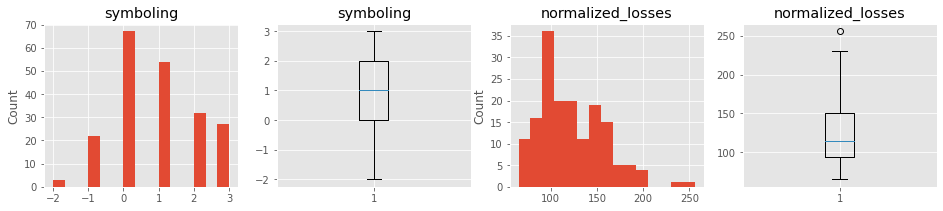

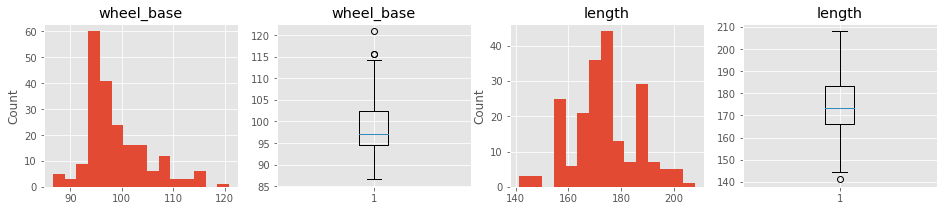

In [6]:
# take out the numeric columns
df_numeric=df.select_dtypes(include =['float64','int64'])
# import pyplot for graph creating
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# for each column, create a histogram and boxplot side by side, this group is the No.1-4 numeric variables
for i in [0,2]:
    figure, axis = plt.subplots(1, 4,figsize=(16,3))
    a=df_numeric.iloc[:,i][~np.isnan(df_numeric.iloc[:,i])]
    axis[0].hist(a, bins=15)
    axis[0].set_title(df_numeric.columns[i])
    axis[0].set_ylabel("Count")
    axis[1].boxplot(a)
    axis[1].set_title(df_numeric.columns[i])
    
    b=df_numeric.iloc[:,i+1][~np.isnan(df_numeric.iloc[:,i+1])]
    axis[2].hist(b, bins=15)
    axis[2].set_title(df_numeric.columns[i+1])
    axis[2].set_ylabel("Count")
    axis[3].boxplot(b)
    axis[3].set_title(df_numeric.columns[i+1])
    
    plt.show()

The symboling is discrete variable, which reflects the safety rank. The distribution is nearly normal, a little bit left skewed. The normalized_losses and wheel_base are right skewed, which normalized_losses shows stronger. Both variables have outliers on the right tail. The car length is generally symmetric but multimodal distributed, with an outlier on the left tail.

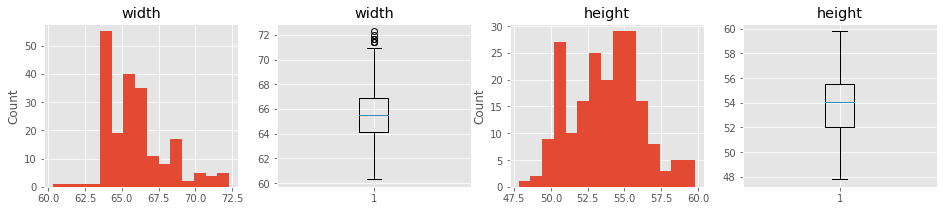

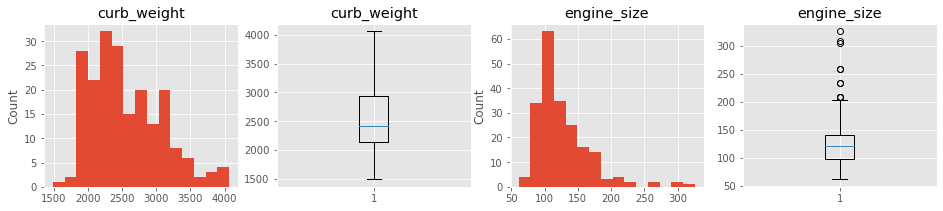

In [7]:
# the 4-8 numeric variables
for i in [4,6]:
    figure, axis = plt.subplots(1, 4,figsize=(16,3))
    a=df_numeric.iloc[:,i][~np.isnan(df_numeric.iloc[:,i])]
    axis[0].hist(a, bins=15)
    axis[0].set_title(df_numeric.columns[i])
    axis[0].set_ylabel("Count")
    axis[1].boxplot(a)
    axis[1].set_title(df_numeric.columns[i])
    
    b=df_numeric.iloc[:,i+1][~np.isnan(df_numeric.iloc[:,i+1])]
    axis[2].hist(b, bins=15)
    axis[2].set_title(df_numeric.columns[i+1])
    axis[2].set_ylabel("Count")
    axis[3].boxplot(b)
    axis[3].set_title(df_numeric.columns[i+1])
    
    plt.show()

The car width and curb_weight show a little bit right skewed, and engine_size shows a strong right skewed distribution with many outliers on the right tail. Interestingly, the height shows a very similar distribution pattern with car length.

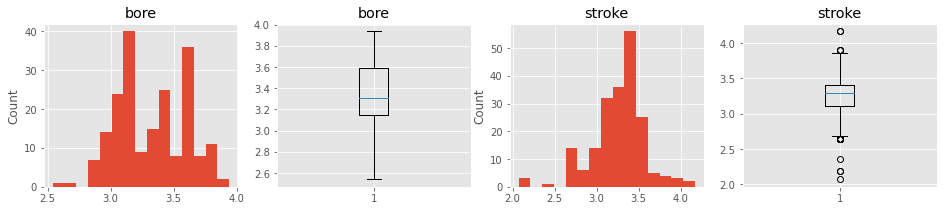

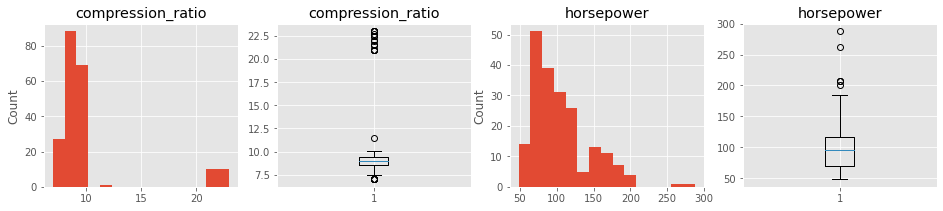

In [8]:
# the 9-12 numeric variables
for i in [8,10]:
    figure, axis = plt.subplots(1, 4,figsize=(16,3))
    a=df_numeric.iloc[:,i][~np.isnan(df_numeric.iloc[:,i])]
    axis[0].hist(a, bins=15)
    axis[0].set_title(df_numeric.columns[i])
    axis[0].set_ylabel("Count")
    axis[1].boxplot(a)
    axis[1].set_title(df_numeric.columns[i])
    
    b=df_numeric.iloc[:,i+1][~np.isnan(df_numeric.iloc[:,i+1])]
    axis[2].hist(b, bins=15)
    axis[2].set_title(df_numeric.columns[i+1])
    axis[2].set_ylabel("Count")
    axis[3].boxplot(b)
    axis[3].set_title(df_numeric.columns[i+1])
    
    plt.show()

The bore and stroke show nearly symmetric distribution, but the bore shows multimodal, while the stroke shows unimodal pattern with many outliers on both tails. The compression_ratio and horsepower show strongly right skewed distribution pattern, with right tail outliers. According to the compression ratio theory, adding compression is that one full point of compression can add between 3 to 4 percent power. Therefore, the compression_ratio and horsepower right skewed pattern might have some relation.

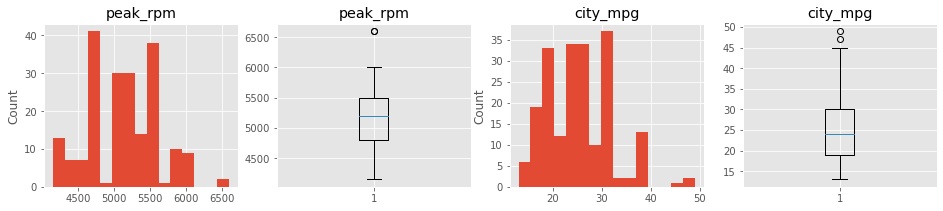

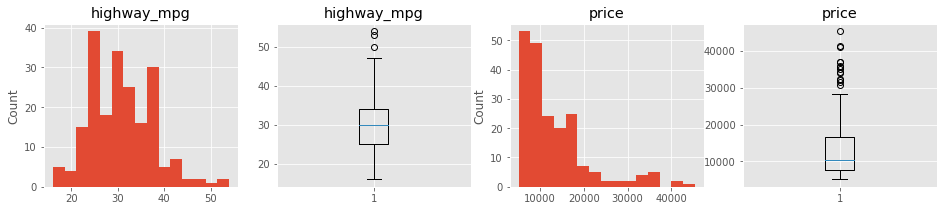

In [9]:
# the 13-16 numeric variables
for i in [12,14]:
    figure, axis = plt.subplots(1, 4,figsize=(16,3))
    a=df_numeric.iloc[:,i][~np.isnan(df_numeric.iloc[:,i])]
    axis[0].hist(a, bins=15)
    axis[0].set_title(df_numeric.columns[i])
    axis[0].set_ylabel("Count")
    axis[1].boxplot(a)
    axis[1].set_title(df_numeric.columns[i])
    
    b=df_numeric.iloc[:,i+1][~np.isnan(df_numeric.iloc[:,i+1])]
    axis[2].hist(b, bins=15)
    axis[2].set_title(df_numeric.columns[i+1])
    axis[2].set_ylabel("Count")
    axis[3].boxplot(b)
    axis[3].set_title(df_numeric.columns[i+1])
    
    plt.show()

The peak_rpm, city_mpg and highway_mpg all have multimodal distribution pattern with outliers on the right tail. The car price is strongly right skewed with right tail outliers, which means some cars are extremely expensive, while most cars are in the low price range.

**Generally, the shape related variables, such as the car length, height, width and curb_weight show similar pattern, which are more symmetric, while the performance related variables, such as the horsepower, compression_ratio and engine_size shows right skewed distribution pattern. The similar pattern variables may have high correlation.**

- For categorical variables

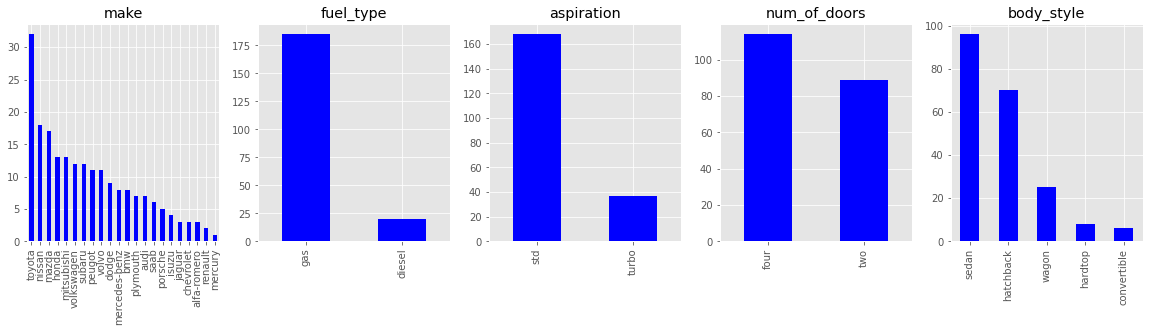

In [10]:
# take out the categorical columns
df_categorical=df.select_dtypes(include ='object')

# for each column, create bar plots, No.1-5
figure, axes = plt.subplots(1, 5,figsize=(20,4))
for i in range(0,5):
    c=df_categorical.iloc[:,i]
    c.value_counts().plot(kind='bar', title=df_categorical.columns[i],ax=axes[i],color='blue')
plt.show()

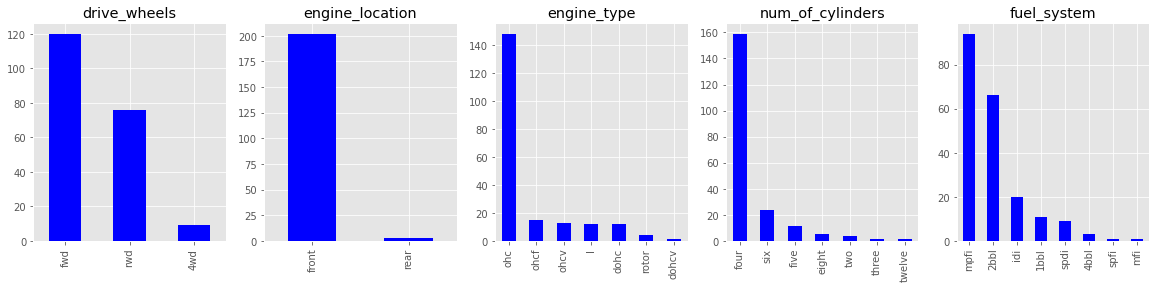

In [11]:
# for each column, create bar plots, No. 6-10
figure, axes = plt.subplots(1, 5,figsize=(20,4))
for i in range(0,5):
    c=df_categorical.iloc[:,i+5]
    c.value_counts().plot(kind='bar', title=df_categorical.columns[i+5],ax=axes[i],color='blue')
plt.show()

As the bar plot shows above, fuel_type, engine_location, aspiration, engine_type and num_of_sylinders show very unbalanced distribution. Large amount of data concentrated on one value. Therefore, these variables seem less useful features for the regression model. Also, the num_of_doors and num_of_cylinders have numeric characteristics, therefore, when dealing with then, they could be analyzed with other numeric variables

## 3. Feature Selection / Dimensionality Reduction
Now it is the time to select the features into the model. However, the null values are still missing in the data frame. As the whole data set is not too big, for the numeric variables, the missing value will be filled with KNN method, which could be more accurate and not so costly. To avoid sensitivity to the scale of features and non-normal shape of certain variables, it is also preferred to transform each numeric column into normalized pattern.

The categorical missing values, which only appear in the num_of_doors attribute, only affect 2 rows. They can be dropped directly as there is no most effective and non-random fill in method for only 2 missing values.

In [12]:
# import library
from sklearn.impute import KNNImputer
# take out the numeric variables
df_numeric_new=df_numeric.iloc[:,:]
# set the imputer
imputer = KNNImputer(n_neighbors=5)
# fill in the missings and convert to dataframe again
df_numeric_new = pd.DataFrame(imputer.fit_transform(df_numeric_new),columns = df_numeric_new.columns)

In [13]:
# transform the data into
from sklearn.preprocessing import power_transform
for name in list(df_numeric_new.columns)[1:-1]:
    df_numeric_new[[name]]=power_transform(df_numeric_new[[name]])
# price needs apply box-cox     
df_numeric_new[['price']]=power_transform(df_numeric_new[['price']],method='box-cox')

In [14]:
# concatenate the frames into the original shape 
df_filled=pd.concat([df_numeric_new, df_categorical], axis=1).dropna()
# sanity check
df_filled.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
0,3.0,0.200422,-2.402418,-0.404369,-0.860326,-2.067534,0.144823,0.380332,0.535037,-1.730378,-0.014205,0.460680,-0.254023,-0.586744,-0.487338,0.470358,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3.0,0.797956,-2.402418,-0.404369,-0.860326,-2.067534,0.144823,0.380332,0.535037,-1.730378,-0.014205,0.460680,-0.254023,-0.586744,-0.487338,0.825956,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1.0,0.797956,-0.699849,-0.205730,-0.035847,-0.533373,0.647098,0.890484,-2.455296,0.669301,-0.014205,1.283813,-0.254023,-0.977418,-0.652500,0.825956,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2.0,1.266334,0.365001,0.233459,0.286775,0.249497,-0.303501,-0.294503,-0.496555,0.418832,0.638775,0.220841,0.789161,-0.065280,-0.020113,0.532094,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2.0,1.266334,0.296266,0.233459,0.394316,0.249497,0.648780,0.535529,-0.496555,0.418832,-1.035191,0.557585,0.789161,-1.188336,-1.369687,0.917362,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


As mentioned in the EDA section, there are two num_of_doors and num_of_cylinders could be analyzed with numeric variables. Therefore, the data type could be changed based on their information.

In [15]:
#knowing categorical variables detail
df_filled['num_of_doors'].value_counts()

four    114
two      89
Name: num_of_doors, dtype: int64

In [16]:
# knowing categorical variables detail
df_filled['num_of_cylinders'].value_counts()

four      157
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

In [17]:
# change the data type based on EDA
df_filled_1=df_filled.replace({'num_of_doors' : { 'four' : 4.0, 'two' : 2.0},
                   'num_of_cylinders' : { 'four' : 4.0, 'six' : 6.0,'five':5.0,'eight':8.0,
                                         'two':2.0,'three':3.0,'twelve':12.0}})
# check changed info
df_filled_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          203 non-null    float64
 1   normalized_losses  203 non-null    float64
 2   wheel_base         203 non-null    float64
 3   length             203 non-null    float64
 4   width              203 non-null    float64
 5   height             203 non-null    float64
 6   curb_weight        203 non-null    float64
 7   engine_size        203 non-null    float64
 8   bore               203 non-null    float64
 9   stroke             203 non-null    float64
 10  compression_ratio  203 non-null    float64
 11  horsepower         203 non-null    float64
 12  peak_rpm           203 non-null    float64
 13  city_mpg           203 non-null    float64
 14  highway_mpg        203 non-null    float64
 15  price              203 non-null    float64
 16  make               203 non

After the data set is prepared, the new testing EDA could be re-run by the correlation coefficient matrix as below.

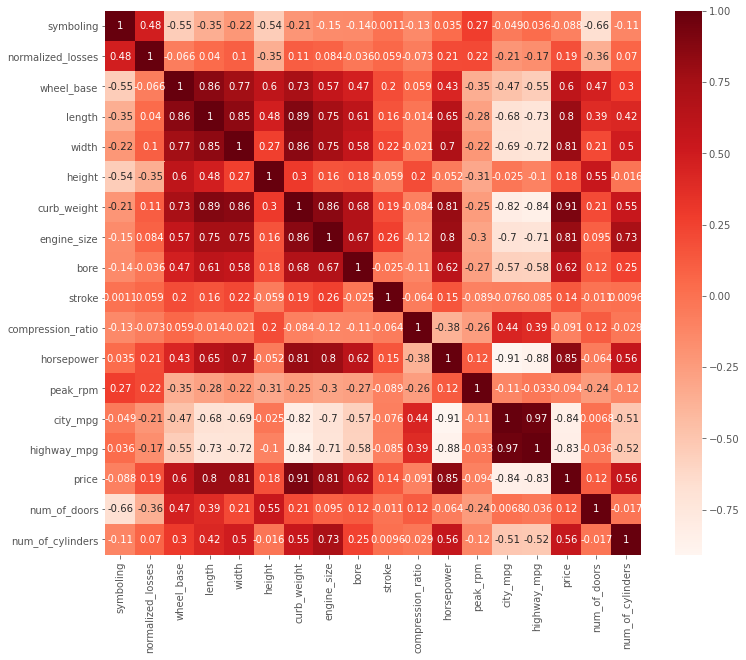

In [18]:
#Using Pearson Correlation
import seaborn as sns
plt.figure(figsize=(12,10))
cor = df_filled_1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Numeric Variables
Based on the information above, we are going to use two types of feature selection and dimensionality reduction methods to deal with the numeric variables. 

#### Stepwise Search

In [19]:
#pull numeric data
data = df_filled_1.select_dtypes(include=['float'])
data.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,num_of_doors,num_of_cylinders
0,3.0,0.200422,-2.402418,-0.404369,-0.860326,-2.067534,0.144823,0.380332,0.535037,-1.730378,-0.014205,0.460680,-0.254023,-0.586744,-0.487338,0.470358,2.0,4.0
1,3.0,0.797956,-2.402418,-0.404369,-0.860326,-2.067534,0.144823,0.380332,0.535037,-1.730378,-0.014205,0.460680,-0.254023,-0.586744,-0.487338,0.825956,2.0,4.0
2,1.0,0.797956,-0.699849,-0.205730,-0.035847,-0.533373,0.647098,0.890484,-2.455296,0.669301,-0.014205,1.283813,-0.254023,-0.977418,-0.652500,0.825956,2.0,6.0
3,2.0,1.266334,0.365001,0.233459,0.286775,0.249497,-0.303501,-0.294503,-0.496555,0.418832,0.638775,0.220841,0.789161,-0.065280,-0.020113,0.532094,4.0,4.0
4,2.0,1.266334,0.296266,0.233459,0.394316,0.249497,0.648780,0.535529,-0.496555,0.418832,-1.035191,0.557585,0.789161,-1.188336,-1.369687,0.917362,4.0,5.0


In [20]:
# what is the dimensionality of the data?
print(data.shape)

(203, 18)


In [21]:
# remove target from dataset
X = data.drop("city_mpg",1)
# target variable
y = data["city_mpg"]

In [22]:
#find correlations
cor_target = abs(cor["city_mpg"])
#filter only highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

length              0.684802
width               0.692293
curb_weight         0.816567
engine_size         0.700637
bore                0.571588
horsepower          0.907878
city_mpg            1.000000
highway_mpg         0.965497
price               0.839063
num_of_cylinders    0.506852
Name: city_mpg, dtype: float64

Now that we found the most correlate variables to the target, we must prove that they are independent from each other and filter any that have high correlation between them.

<AxesSubplot:>

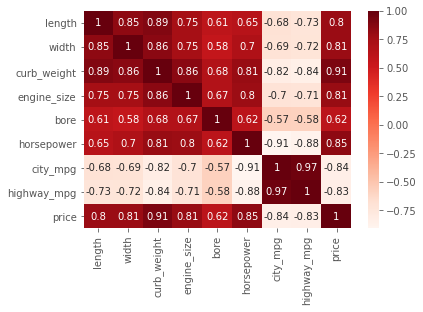

In [23]:
filter_features=data[['length','width','curb_weight','engine_size','bore','horsepower','city_mpg','highway_mpg','price']]
cor2 = filter_features.corr()
sns.heatmap(cor2, annot=True, cmap=plt.cm.Reds)

Because all the variables also have a high correlation between them it means filter method may not be the correct one for this dataset.

##### Backward Elimination

In [24]:
'''**********************************
Original code cited from https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
*************************************'''
import statsmodels.api as sm
# Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    # sm requires that have an additional variable with a constant of one
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    # selects all as feature variables
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    # iterates and removes variables that are not a good fit
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['symboling', 'compression_ratio', 'horsepower', 'peak_rpm', 'highway_mpg', 'price']


##### Forward Selection

In [25]:
import warnings
warnings.filterwarnings('ignore')
'''**********************************
Original code cited from https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/

*************************************'''

def forward_selection(data, target, significance_level=0.05):
    #adds all columns
    features = data.columns.tolist()
    #empty list for selected features
    best_features = []
    while (len(features)>0):
        remaining_features = list(set(features)-set(best_features))
        #p value variable
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            #adds selected features to the list
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

print(forward_selection(X,y))

['highway_mpg', 'horsepower', 'symboling', 'compression_ratio', 'price', 'peak_rpm']


In [26]:
# check the correlation of selected features
data[['symboling', 'compression_ratio', 'horsepower', 'peak_rpm', 'highway_mpg', 'price']].corr()

,symboling,compression_ratio,horsepower,peak_rpm,highway_mpg,price
symboling,1.000000,-0.133063,0.035229,0.270096,0.036245,-0.087665
compression_ratio,-0.133063,1.000000,-0.376178,-0.255666,0.392413,-0.091132
horsepower,0.035229,-0.376178,1.000000,0.124525,-0.875435,0.849524
peak_rpm,0.270096,-0.255666,0.124525,1.000000,-0.033018,-0.094387
highway_mpg,0.036245,0.392413,-0.875435,-0.033018,1.000000,-0.827425
price,-0.087665,-0.091132,0.849524,-0.094387,-0.827425,1.000000


From Backward elimination and Forward selection, we obtained the same selected variables within the significance level so we conclude that we can use those variables for our model.

#### PCA
As the backward elimination and forward selection finally reached 6 variables, for the purpose of dimensionality reduction, we would try to use the PCA to reduce the variables from the 6 no strong correlated variables to a even smaller number of dimensions.

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# filter method
X_pca = data[['symboling', 'compression_ratio', 'horsepower', 'peak_rpm', 'highway_mpg', 'price']]
# Target Variable
y_pca = data[["city_mpg"]]

# standarize the variables
sc = StandardScaler()
X_pca_st = sc.fit_transform(X_pca)

# create smaller size PCs as 2
pca = PCA(n_components = 2)

pca.fit(X_pca_st)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.47409306 0.24159553]
0.7156885943372087


Now the predictors reduced to 2 primary components, the total reduced dimensions contain 0.715 components of the original variables.

### Categorical Variables
The categorical values will be applied ANOVA to filter which categorical variables have larger variance, which will contribute more to the prediction. Then drop the less important ones. The first step is to hot-encode the variables.

In [28]:
#pull categorical data
data_2=df_filled_1.select_dtypes(include=['object'])
#data_2 = df_filled_1[['make','body_style','drive_wheels','fuel_system']]
t=data["city_mpg"]
# get dummy data of the last variable STARS
dum=pd.get_dummies(data_2)
# sanity check
dum.head()

,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel_type_diesel,fuel_type_gas,aspiration_std,aspiration_turbo,body_style_convertible,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_4wd,drive_wheels_fwd,drive_wheels_rwd,engine_location_front,engine_location_rear,engine_type_dohc,engine_type_dohcv,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [29]:
# import libraries for ANOVA F-test between label/feature for classification tasks
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# set the selector with f score evaluation.
selector=SelectKBest(f_classif, k=8)
#fit the dummy data
select_k_best_classifier = selector.fit_transform(dum, t)
# prepare the full list of feature names
feature_names= dum.columns

In [30]:
'''**************************************
# cite from: https://stackoverflow.com/questions/39839112/the-easiest-way-for-getting-feature-names-after-running-selectkbest-in-scikit-le
# The following block was mainly changing getting the selected column names
**************************************'''
mask = selector.get_support() #list of booleans
new_features = [] # The list of your K best features
for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)

        
print(new_features)

['make_chevrolet', 'make_jaguar', 'make_mercedes-benz', 'fuel_type_diesel', 'fuel_type_gas', 'fuel_system_2bbl', 'fuel_system_idi', 'fuel_system_mpfi']


Based on the F-test selection, the top 8 important variables are mainly about the make, fuel_type and fuel_system. However, the fuel_type record is very imbalanced, which means the 'fuel_type_gas' has very few observations, which may have bias influence on the F-test. Therefore, total 2 categorical variables will be selected for the regression model.

## 4. Regression Model Evaluation

#### Stepwise Feature Selection Regression Model Accuracy
Apply the selected 9 variables: 'make','fuel_type','fuel_system','symboling', 'compression_ratio', 'horsepower', 'peak_rpm', 'highway_mpg' and 'price' to create the regression model. Cross-validation is used for evaluating the average accuracy of model. As the data set has around 200 records, we divided the training set into 5 folds.

In [31]:
# selected numerical variables as predictors
X_1=data[['symboling', 'compression_ratio', 'horsepower', 'peak_rpm', 'highway_mpg', 'price']]
# select city_mpg as response variable
y_1= data[["city_mpg"]]

In [32]:
# import the train_test_split function
from sklearn.model_selection import train_test_split
# import the LinearRegression function
from sklearn.linear_model import LinearRegression
# import the cross_val_score function
from sklearn.model_selection import cross_val_score

# split the data into training and testing
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.2)

# setting a linearregression model
md_fs_num = LinearRegression()
# fit the model with 5-fold cross validation and test the accruracy
# we select 5-fold because our data set is relatively small and with 5 our samples are larger
scores_1 = cross_val_score(md_fs_num, X_1_train, y_1_train, cv=5)
# print out the accuracy metrics derived from the K-fold cross validation process
print (scores_1)

[0.96322414 0.97664676 0.94212361 0.97517081 0.93555012]


In [34]:
# calculate the average accuracy across all 5 folds
print("The numeric selected features model has "+ str(round(scores_1.mean(),2))+" accuracy with a standard deviation of "+str(round(scores_1.std(),2)))

The numeric selected features model has 0.96 accuracy with a standard deviation of 0.02


#### PCA Regression Model Accuracy
In this model, we will test the selected feature reduced to 3 principal components, will it be keeping the same accuracy.

In [45]:
# clearify the predictors and response variables
X_2= pca.transform(X_pca_st)
y_2= data[["city_mpg"]]

# split the pricipal components to training and testing groups
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_2, y_2, test_size = .2, random_state = 1)

# setting a linearregression model
md_pca_num = LinearRegression()
# fit the model with 5-fold cross validation and test the accruracy
# we select 5-fold because our data set is relatively small and with 5 our samples are larger
scores_2 = cross_val_score(md_pca_num, X_pca_train, y_pca_train, cv=5)
# print out the accuracy metrics derived from the K-fold cross validation process
print (scores_2)

[0.94345182 0.90299595 0.93718595 0.95924643 0.94903637]


In [46]:
# calculate the average accuracy across all 5 folds
print("The PCA model has "+ str(round(scores_2.mean(),2))+" accuracy with a standard deviation of "+str(round(scores_2.std(),2)))

The PCA model has 0.94 accuracy with a standard deviation of 0.02


#### Overall Selected Variables Regression Model Accuracy
As the previous models only contains the numeric information, if added the selected categorical variables, will the accuracy change? We will conduct the following regression model test.

In [37]:
# create dummy data with categorical for Regression Modeling
dum_mod=pd.get_dummies(data_2[['make','fuel_system']])
# concatenate selected variables as predictors
X_3=pd.concat([data[['symboling', 'compression_ratio', 'horsepower', 'peak_rpm', 'highway_mpg','price']],dum_mod], axis=1)
# select city_mpg as response variable
y_3= data[["city_mpg"]]

# split the pricipal components to training and testing groups
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_3, y_3, test_size = .2, random_state = 1)

# setting a linearregression model
full_var = LinearRegression()
# fit the model with 5-fold cross validation and test the accruracy
# we select 5-fold because our data set is relatively small and with 5 our samples are larger
scores_3 = cross_val_score(full_var, X_full_train, y_full_train, cv=5)
# print out the accuracy metrics derived from the K-fold cross validation process
print (scores_3)

[0.96271715 0.96455086 0.97294739 0.9629556  0.95283633]


In [38]:
# calculate the average accuracy across all 5 folds
print("The full selected features model has "+ str(round(scores_3.mean(),2))+" accuracy with a standard deviation of "+str(round(scores_3.std(),2)))

The full selected features model has 0.96 accuracy with a standard deviation of 0.01


## 5. Conclusions 
As the results shown, the three regression models have almost the same accuracy. While the PCA model has only 2 dimensions, which is the least, with average accuracy tiny less than the model applied with 6 selected features. Catergorical varibles does not contribute much to the regression model as the model accuracy didn't change after being added. Therefore, it is a good choice to **reduce the total 26 features to 2 principal components**. The attempt of regression model with the 2 principal components could be made under cross-validation reaching average accuracy 0.94.

### References
https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b<br>
https://powersports.jepistons.com/blog/compression-ratio-theory-and-how-to-calculate-in-powersports<br>
https://stackoverflow.com/questions/39839112/the-easiest-way-for-getting-feature-names-after-running-selectkbest-in-scikit-le<br>
https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/<br>
https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b<br>
https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/